### All warnings are supressed to produce more concise output.

In [96]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [97]:
pip install numpy

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [98]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [99]:
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

### Importing the datasets. The datasets are from years 2014, 2016, 2017 and 2018.

In [100]:
import pandas as pd  # data processing, CSV file I/O

survey2014 = pd.read_csv('datasets/dataset1.csv')
survey2016 = pd.read_csv('datasets/dataset2.csv')
survey2017 = pd.read_csv('datasets/dataset3.csv')
survey2018 = pd.read_csv('datasets/dataset4.csv')
survey2019 = pd.read_csv('datasets/dataset5.csv')

survey141619 =  pd.concat([survey2014, survey2016, survey2019], ignore_index=True, sort=True)
survey1718 = pd.concat([survey2017, survey2018], ignore_index=True, sort=True)

survey = pd.concat([survey141619, survey1718], ignore_index=True, sort=True)
print(survey.shape)

(4218, 210)


### All the surveys have been collected and placed in a list of datasets. Now, to clean the dataset, a function is defined which takes the dataset and removes some common impurities.
#### 1. HTML elements
#### 2. Un-needed columns
#### 3. Reset index

In [101]:
import re 

def cleanColumns(dataframe):
    dataframe.columns = map(str.lower, dataframe.columns)

    # Remove HTML artifacts
    dataframe.rename(columns=lambda colname: re.sub('</\w+>', '', colname), inplace=True)
    dataframe.rename(columns=lambda colname: re.sub('<\w+>', '', colname), inplace=True)
    dataframe.rename(columns = {'how many employees does your company or organization have?':'Company Size', 
                                'do you have a family history of mental illness?' : 'Family History of Mental Illness'}, inplace = True) 
 
    dataframe.drop(columns=['#', 'start date (utc)', 'submit date (utc)', 'network id', 'timestamp'], inplace=True)
    dataframe.reset_index(drop=True)

    return dataframe

survey = cleanColumns(survey)
print(survey.shape)

(4218, 205)


### It is important to know the make up of the data and the number of null values / dirty values or noise present in it. To help with this a funtion is defined which takes the data and plots the number of null or impure values. The blue bars show missing data. Presence of large number of blue bars means the dataset is full of empty or impure values.

                                                    Total missing     Percent
eating disorder (anorexia, bulimia, etc)                     4218  100.000000
dissociative disorder                                        4218  100.000000
stress response syndromes                                    4218  100.000000
describe the circumstances of the supportive or...           4218  100.000000
post-traumatic stress disorder                               4218  100.000000
attention deficit hyperactivity disorder                     4218  100.000000
substance use disorder                                       4218  100.000000
personality disorder (borderline, antisocial, p...           4218  100.000000
psychotic disorder (schizophrenia, schizoaffect...           4218  100.000000
addictive disorder                                           4218  100.000000
anxiety disorder (generalized, social, phobia, ...           4218  100.000000
psychotic disorder (schizophrenia, schizoaffect...           421

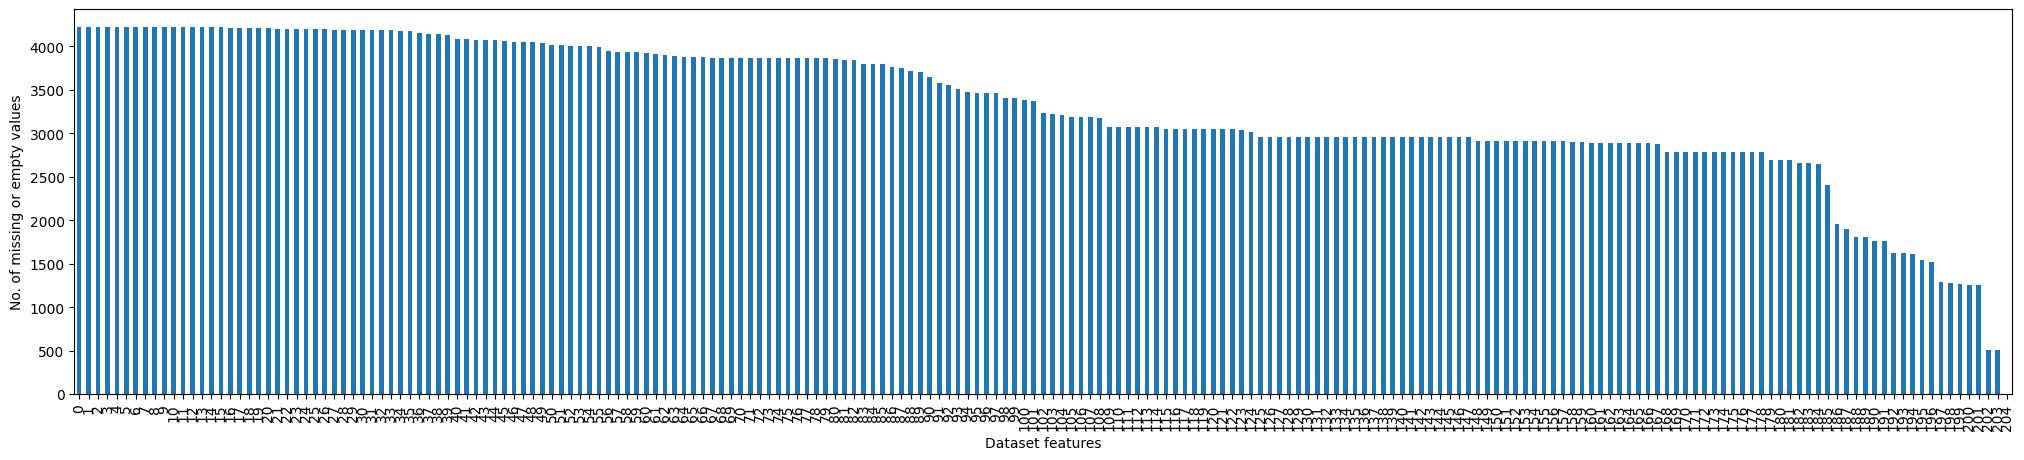

In [102]:
import numpy as np; 
import matplotlib.pyplot as plt
%matplotlib inline

def ShowNullValues(dataframe):
    total = dataframe.isnull().sum().sort_values(ascending=False)
    nullValues = dataframe.isnull().sum()
    totalValues = dataframe.isnull().count()
    percent = (nullValues/totalValues).sort_values(ascending=False)
    missingData = pd.concat([total, percent*100], axis=1, keys=['Total missing', 'Percent'])
    print(missingData.head(20))
    plt.figure(figsize=(25,5))
    total.plot.bar()
    y = ((lambda x: str(x)) (x) for x in range(len(dataframe.columns)))
    plt.xticks(np.arange(len(dataframe.columns)), (y))
    plt.ylabel("No. of missing or empty values")
    plt.xlabel("Dataset features")
    plt.show()
    return missingData

noisyData = ShowNullValues(survey)

                                                    Total missing     Percent
eating disorder (anorexia, bulimia, etc)                     4218  100.000000
dissociative disorder                                        4218  100.000000
stress response syndromes                                    4218  100.000000
describe the circumstances of the supportive or...           4218  100.000000
post-traumatic stress disorder                               4218  100.000000
attention deficit hyperactivity disorder                     4218  100.000000
substance use disorder                                       4218  100.000000
personality disorder (borderline, antisocial, p...           4218  100.000000
psychotic disorder (schizophrenia, schizoaffect...           4218  100.000000
addictive disorder                                           4218  100.000000
anxiety disorder (generalized, social, phobia, ...           4218  100.000000
psychotic disorder (schizophrenia, schizoaffect...           421

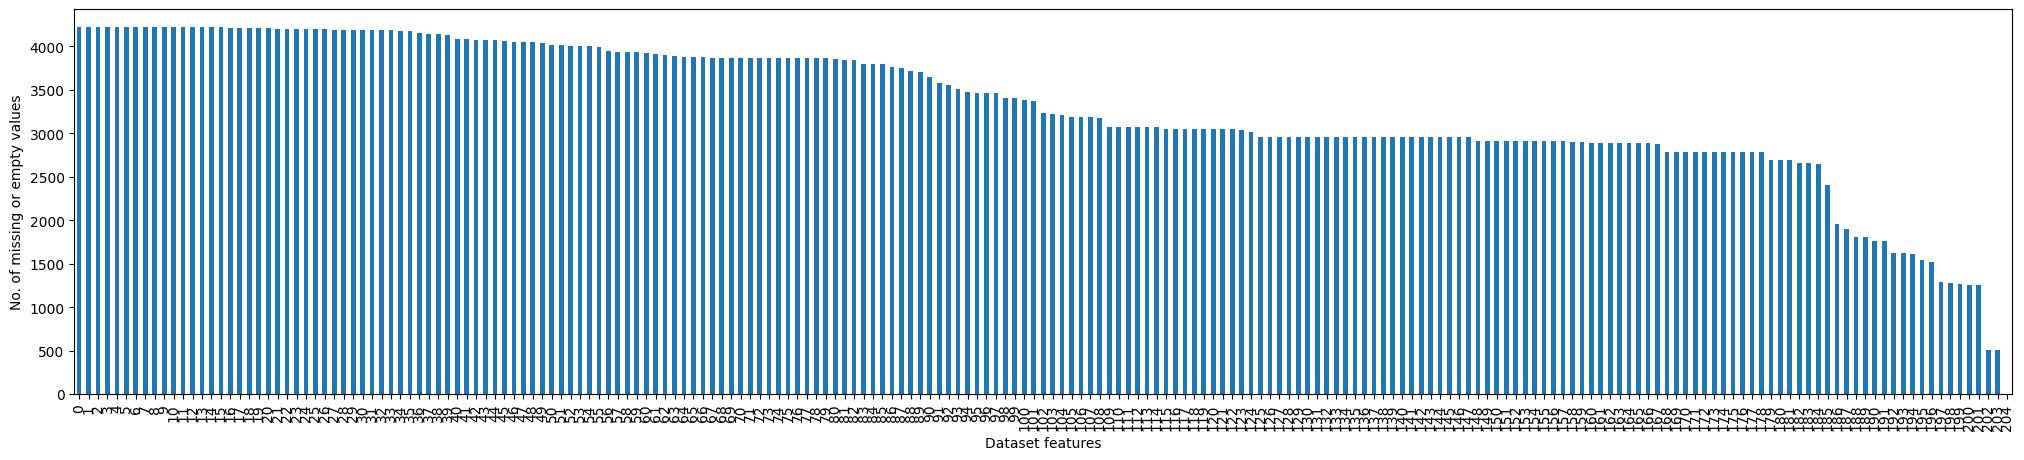

In [103]:
import numpy as np; 
import matplotlib.pyplot as plt
%matplotlib inline

def ShowNullValues(dataframe):
    total = dataframe.isnull().sum().sort_values(ascending=False)
    nullValues = dataframe.isnull().sum()
    totalValues = dataframe.isnull().count()
    percent = (nullValues/totalValues).sort_values(ascending=False)
    missingData = pd.concat([total, percent*100], axis=1, keys=['Total missing', 'Percent'])
    print(missingData.head(20))
    plt.figure(figsize=(25,5))
    total.plot.bar()
    y = ((lambda x: str(x)) (x) for x in range(len(dataframe.columns)))
    plt.xticks(np.arange(len(dataframe.columns)), (y))
    plt.ylabel("No. of missing or empty values")
    plt.xlabel("Dataset features")
    plt.show()
    return missingData

noisyData = ShowNullValues(survey)

### Ouch! The dataset is full of missing or impure values which need to be cleaned before any further analysis can be carried out. 

### To start with, the age and gender data is cleaned.

In [104]:
# ageDistribution = survey.loc[:, survey.columns.str.contains('age', regex=True)]
ageDistribution = survey.loc[:, ['age', 'what is your age?']]
ageDistribution.fillna(0, inplace=True)
survey.loc[:,'Age'] = ageDistribution.sum(axis=1)
survey.loc[survey['Age']>100, 'Age'] = 0
survey.loc[survey['Age']<10, 'Age'] = 0
survey['Age-Group'] = pd.cut(survey['Age'], [0, 20, 30, 40, 65, 100], labels=["0-20", "21-30", "31-40", "41-65", "66-100"], include_lowest=True)
survey.drop(ageDistribution, axis=1, inplace=True)
showAge = survey['Age']
print(showAge.unique())

[37. 44. 32. 31. 33. 35. 39. 42. 23. 29. 36. 27. 46. 41. 34. 30. 40. 38.
 50. 24. 18. 28. 26. 22. 19. 25. 45. 21.  0. 43. 56. 60. 54. 55. 48. 20.
 57. 58. 47. 62. 51. 65. 49. 53. 61. 11. 72. 52. 17. 63. 99. 66. 59. 15.
 74. 70. 64. 67.]


In [105]:
genderDistribution = survey.loc[:, survey.columns.str.contains('gender|Gender', regex=True)]
survey['Gender'] = genderDistribution.apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
survey.loc[survey['Gender'].str.contains('Trans|them|trans|Undecided|Contextual|transgender|nb|unicorn|Unicorn|queer|NB|binary|Enby|Human|little|androgynous|Androgyne|Neutral|Agender|Androgynous|Androgynous|Fluid|GenderFluid|Genderflux|genderqueer|Genderqueer' , regex=True), 'Gender'] = 'Undecided'
survey.loc[survey['Gender'].str.contains('Female|female|FEMALE|Woman|woman|w|womail|W|Cis female| Female (cis)|Cis Female|cis female|cis woman|F|f' , regex=True), 'Gender'] = 'Female'
cond1 = survey['Gender']!='Female'
cond2 = survey['Gender']!='Undecided'
survey.loc[cond1 & cond2, 'Gender'] = 'Male'
survey.drop(genderDistribution, axis=1, inplace=True)
showGender = survey['Gender']
print(showGender.unique())

['Female' 'Male' 'Undecided']


### Number of respondents who have sought treatment for mental health conditions.

In [106]:
soughtTreatment = survey.loc[:, survey.columns.str.contains('sought treatment')]
soughtTreatment.fillna('', inplace=True)
survey['Sought Treatment'] = soughtTreatment.apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
survey.loc[survey['Sought Treatment'].str.contains('yes|1.0|1|Yes|True|true' , regex=True, na=False), 'Sought Treatment'] = 1
survey.loc[survey['Sought Treatment'].str.contains('no|0.0|0|No|False|false' , regex=True, na=False), 'Sought Treatment'] = 0
survey.drop(soughtTreatment, axis=1, inplace=True)
showSoughtTreatment = survey['Sought Treatment']
print(showSoughtTreatment.unique())

[1 0]


                                                    Total missing     Percent
eating disorder (anorexia, bulimia, etc)                     4218  100.000000
dissociative disorder                                        4218  100.000000
other                                                        4218  100.000000
addictive disorder                                           4218  100.000000
attention deficit hyperactivity disorder                     4218  100.000000
obsessive-compulsive disorder                                4218  100.000000
stress response syndromes                                    4218  100.000000
mood disorder (depression, bipolar disorder, etc)            4218  100.000000
psychotic disorder (schizophrenia, schizoaffect...           4218  100.000000
personality disorder (borderline, antisocial, p...           4218  100.000000
substance use disorder                                       4218  100.000000
describe the circumstances of the supportive or...           421

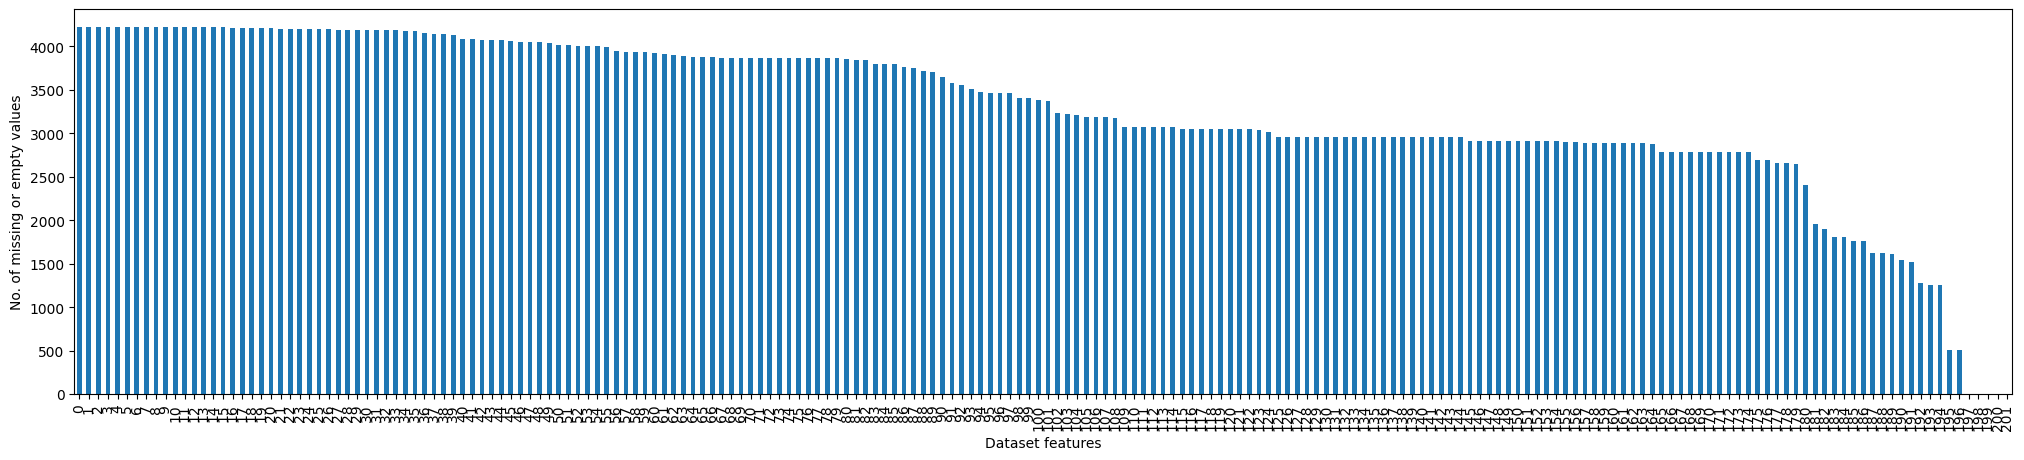

In [107]:
noisyData = ShowNullValues(survey)

### Description of prior experience with discussing about mental health.

In [108]:
describethe = survey.loc[:, survey.columns.str.contains('describe the')]
describethe.fillna('', inplace=True)
survey['Describe Past Experience'] = describethe.apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
survey.drop(describethe, axis=1, inplace=True)
showPastExperience = survey['Describe Past Experience']
print(showPastExperience)

0                                                        
1                                                        
2                                                        
3                                                        
4                                                        
                              ...                        
4213                                                     
4214        Told about My depression got supportive re...
4215        I've brought up my depression with previou...
4216      Multiple conversations Supportive. They unde...
4217    Coworker transitioned mtf and was treated poor...
Name: Describe Past Experience, Length: 4218, dtype: object


In [109]:
anon = survey.loc[:, survey.columns.str.contains('anonymous')]
anon.fillna('', inplace=True)
survey['Prefer Anonymity'] = anon.apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
survey.loc[survey['Prefer Anonymity'].str.contains('yes|1.0|1|Yes|True|true', regex=True, na=False), 'Prefer Anonymity'] = 1
survey.loc[survey['Prefer Anonymity'].str.contains('no|0.0|0|No|False|false' , regex=True, na=False), 'Prefer Anonymity'] = 0
survey.drop(anon, axis=1, inplace=True)
showPreferAnonymity = survey['Prefer Anonymity']
print(showPreferAnonymity.unique())

['  ' 0 1]


In [110]:
react = survey.loc[:, survey.columns.str.contains('react')]
react.fillna('', inplace=True)
survey['Rate Reaction to Problems'] = react.apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
survey.loc[survey['Rate Reaction to Problems'].str.contains('0.0|1.0|2.0|3.0|4.0|5.0', regex=True), 'Rate Reaction to Problems'] = 'Below Average'
survey.loc[survey['Rate Reaction to Problems'].str.contains('6.0|7.0|8.0|9.0|10.0', regex=True), 'Rate Reaction to Problems'] = 'Above Average'
survey.drop(react, axis=1, inplace=True)
showReaction = survey['Rate Reaction to Problems']
print(showReaction.unique())

['  ' 'Above Average' 'Below Average']


In [111]:
neg = survey.loc[:, survey.columns.str.contains('negative|badly', regex=True)]
neg.fillna(' ', inplace=True)
survey['Negative Consequences'] = neg.apply(lambda row: ''.join(row.values.astype(str)), axis=1)
survey.loc[survey['Negative Consequences'].str.contains('yes|1.0|1|Yes' , regex=True), 'Negative Consequences'] = 'Yes'
survey.loc[survey['Negative Consequences'].str.contains('maybe|Maybe|1' , regex=True), 'Negative Consequences'] = 'Maybe'
survey.loc[survey['Negative Consequences'].str.contains('no|No|0' , regex=True), 'Negative Consequences'] = 'No'
survey.loc[survey['Negative Consequences'].str.contains('self-employed' , regex=True), 'Negative Consequences'] = 'Self-Employed'
survey.drop(neg, axis=1, inplace=True)
showNegativeConsequnces = survey['Negative Consequences']
print(showNegativeConsequnces.unique())

['No' 'Maybe' 'Yes' 'Self-Employed' '              ']


### The location of respondents taking the OSMI Mental Health survey.

In [112]:
work = survey.loc[:, survey.columns.str.contains('work in', regex=True)]
survey.drop(work, axis=1, inplace=True)
state = survey.loc[:, survey.columns.str.contains('country', regex=True)]
state.fillna('', inplace=True)
survey['Location'] = state.apply(lambda row: ''.join(row.values.astype(str)), axis=1)
survey.loc[survey['Location'].str.contains('[A-Z][A-Z]|United States' , regex=True), 'Location'] = 'USA'
showLocation = survey['Location']
survey.drop(state, axis=1, inplace=True)
print(showLocation.unique())

['USA' 'Canada' 'United Kingdom' 'Bulgaria' 'France' 'Portugal'
 'Netherlands' 'Switzerland' 'Poland' 'Australia' 'Germany' 'Russia'
 'Mexico' 'Brazil' 'Slovenia' 'Costa Rica' 'Austria' 'Ireland' 'India'
 'South Africa' 'Italy' 'Sweden' 'Colombia' 'Latvia' 'Romania' 'Belgium'
 'New Zealand' 'Zimbabwe' 'Spain' 'Finland' 'Uruguay' 'Israel'
 'Bosnia and Herzegovina' 'Hungary' 'Singapore' 'Japan' 'Nigeria'
 'Croatia' 'Norway' 'Thailand' 'Denmark' 'Bahamas, The' 'Greece' 'Moldova'
 'Georgia' 'China' 'Czech Republic' 'Philippines' 'Lithuania' 'Venezuela'
 'Argentina' 'Vietnam' 'Slovakia' 'Bangladesh' 'Algeria' 'Pakistan'
 'Afghanistan' 'Other' 'Brunei' 'Iran' 'Ecuador' 'Chile' 'Guatemala'
 'Taiwan' 'Serbia' 'Estonia' 'United KingdomUnited Kingdom'
 'NetherlandsNetherlands' 'CanadaCanada' 'TurkeyTurkey' 'BelgiumBelgium'
 'CroatiaCroatia' 'United KingdomOther' 'GhanaGhana' 'NorwayNorway'
 'PortugalPortugal' 'SwitzerlandSwitzerland' 'PakistanPakistan'
 'PolandPoland' 'SpainSpain' 'IndiaIndia' '

### It's important to know if the respondents have access to any resources regarding mental health issues or remedies.

In [113]:
resources = survey.loc[:, survey.columns.str.contains('resources', regex=True)]
resources.fillna('', inplace=True)
survey['Access to information'] = resources.apply(lambda row: ''.join(row.values.astype(str)), axis=1)
survey.loc[survey['Access to information'].str.contains('yes|Yes' , regex=True, na=False), 'Access to information'] = 1
survey.loc[survey['Access to information'].str.contains('no|No' , regex=True, na=False), 'Access to information'] = 0
survey.drop(resources, axis=1, inplace=True)
showAccessToInformation = survey['Access to information']
print(showAccessToInformation.unique())

[1 0]


                                                    Total missing     Percent
dissociative disorder                                        4218  100.000000
anxiety disorder (generalized, social, phobia, ...           4218  100.000000
psychotic disorder (schizophrenia, schizoaffect...           4218  100.000000
psychotic disorder (schizophrenia, schizoaffect...           4218  100.000000
*what disorder(s) have you been diagnosed with?*             4218  100.000000
eating disorder (anorexia, bulimia, etc)                     4218  100.000000
mood disorder (depression, bipolar disorder, etc)            4218  100.000000
obsessive-compulsive disorder                                4218  100.000000
stress response syndromes                                    4218  100.000000
personality disorder (borderline, antisocial, p...           4218  100.000000
other                                                        4218  100.000000
attention deficit hyperactivity disorder                     421

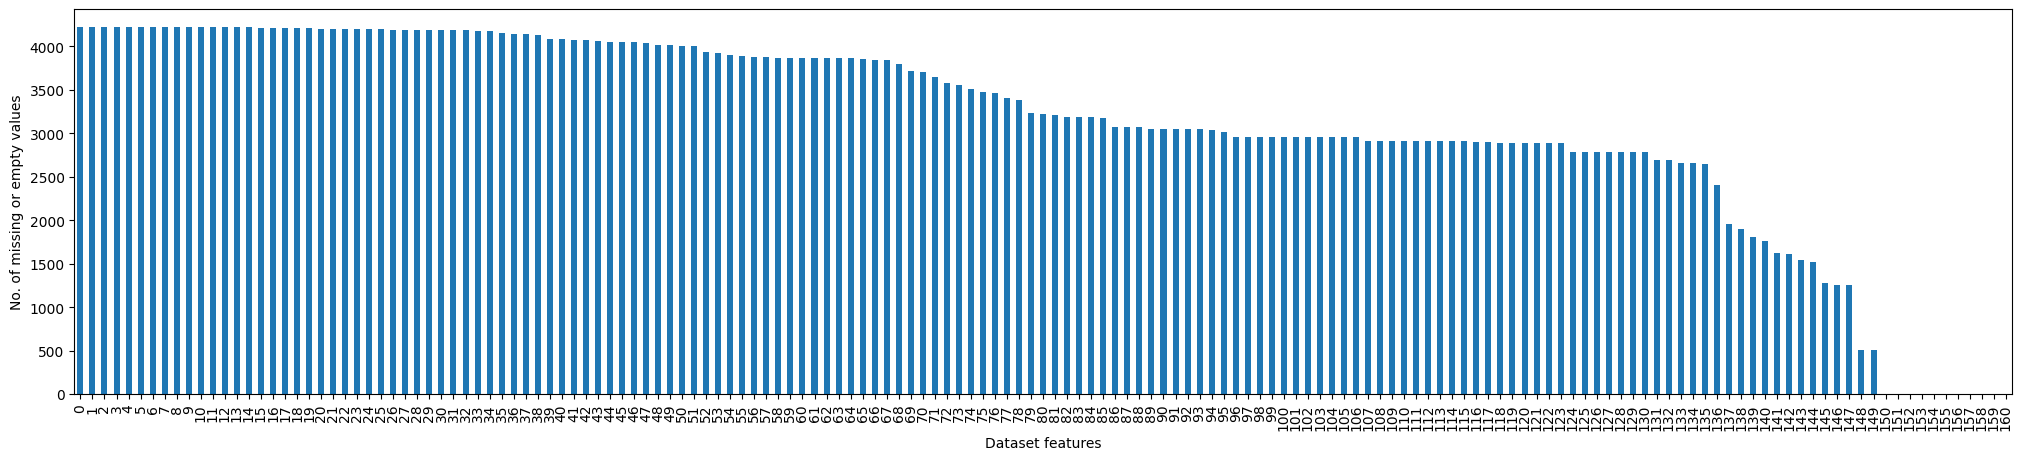

In [114]:
noisyData = ShowNullValues(survey)

### Let's explore if the respondents have had any history of past diagnosis or if they find it comfortable to discuss their problems with their co-workers or supervisors.  

In [115]:
insurance = survey.loc[:, survey.columns.str.contains('insurance', regex=True)]
insurance.fillna('', inplace=True)
survey['Insurance'] = insurance.apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
survey.loc[survey['Insurance'].str.contains('1.0|1|True|true' , regex=True, na=False), 'Insurance'] = 1
survey.loc[survey['Insurance'].str.contains('0.0|0|False|false' , regex=True, na=False), 'Insurance'] = 0
survey.drop(insurance, axis=1, inplace=True)
showInsurance = survey['Insurance']
print(showInsurance.unique())

[' ' 1 0]


In [116]:
diagnosis = survey.loc[:, survey.columns.str.contains('diagnosed|Diagnosed|diagnose|Diagnose', regex=True)]
diagnosis.fillna(' ', inplace=True)
survey['Diagnosis'] = diagnosis.apply(lambda row: ''.join(row.values.astype(str)), axis=1)
survey.loc[survey['Diagnosis'].str.contains('yes|Yes|True|true' , regex=True), 'Diagnosis'] = 'Yes'
survey.loc[survey['Diagnosis'].str.contains('no|No|False|false' , regex=True), 'Diagnosis'] = 'No'
survey.loc[survey['Diagnosis'].str.contains('sometimes|Sometimes' , regex=True), 'Diagnosis'] = 'Sometimes'
survey.drop(diagnosis, axis=1, inplace=True)
showDiagnosis = survey['Diagnosis']
print(showDiagnosis.unique())

['           ' 'Yes' 'No' 'Sometimes']


In [117]:
discuss = survey.loc[:, survey.columns.str.contains('discuss|Discuss', regex=True)]
discuss.fillna('', inplace=True)
survey['Discuss Mental Health Problems'] = discuss.apply(lambda row: ''.join(row.values.astype(str)), axis=1)
survey.loc[survey['Discuss Mental Health Problems'].str.contains('some|Some' , regex=True), 'Discuss Mental Health Problems'] = 'Maybe'
survey.loc[survey['Discuss Mental Health Problems'].str.contains('yes|Yes' , regex=True), 'Discuss Mental Health Problems'] = 'Yes'
survey.loc[survey['Discuss Mental Health Problems'].str.contains('no|No' , regex=True), 'Discuss Mental Health Problems'] = 'No'
survey.drop(discuss, axis=1, inplace=True)
showDiscussMentalHealthProblems = survey['Discuss Mental Health Problems']
print(showDiscussMentalHealthProblems.unique())

['Maybe' 'No' 'Yes' '']


### An employer or organisation that positively treats issues regarding mental health goes a long way in making the worlplace friendlier.

In [118]:
response = survey.loc[:, survey.columns.str.contains('handled|provided|serious', regex=True)]
response.fillna(' ', inplace=True)
survey['Responsible Employer'] = response.apply(lambda row: ''.join(row.values.astype(str)), axis=1)
survey.loc[survey['Responsible Employer'].str.contains('some|Some' , regex=True), 'Responsible Employer'] = 'Maybe'
survey.loc[survey['Responsible Employer'].str.contains('yes|Yes' , regex=True), 'Responsible Employer'] = 'Yes'
survey.loc[survey['Responsible Employer'].str.contains('no|No' , regex=True), 'Responsible Employer'] = 'No'
survey.loc[survey['Responsible Employer'].str.contains('self-employed' , regex=True), 'Responsible Employer'] = 'Self-Employed'
survey.drop(response, axis=1, inplace=True)
showResposibleEmployer = survey['Responsible Employer']
print(showResposibleEmployer.unique())

['Yes' 'No' 'Maybe' '          ' 'Self-Employed']


                                                    Total missing     Percent
mood disorder (depression, bipolar disorder, etc)            4218  100.000000
eating disorder (anorexia, bulimia, etc)                     4218  100.000000
dissociative disorder                                        4218  100.000000
substance use disorder                                       4218  100.000000
attention deficit hyperactivity disorder                     4218  100.000000
stress response syndromes                                    4218  100.000000
psychotic disorder (schizophrenia, schizoaffect...           4218  100.000000
psychotic disorder (schizophrenia, schizoaffect...           4218  100.000000
post-traumatic stress disorder                               4218  100.000000
anxiety disorder (generalized, social, phobia, ...           4218  100.000000
personality disorder (borderline, antisocial, p...           4218  100.000000
addictive disorder                                           421

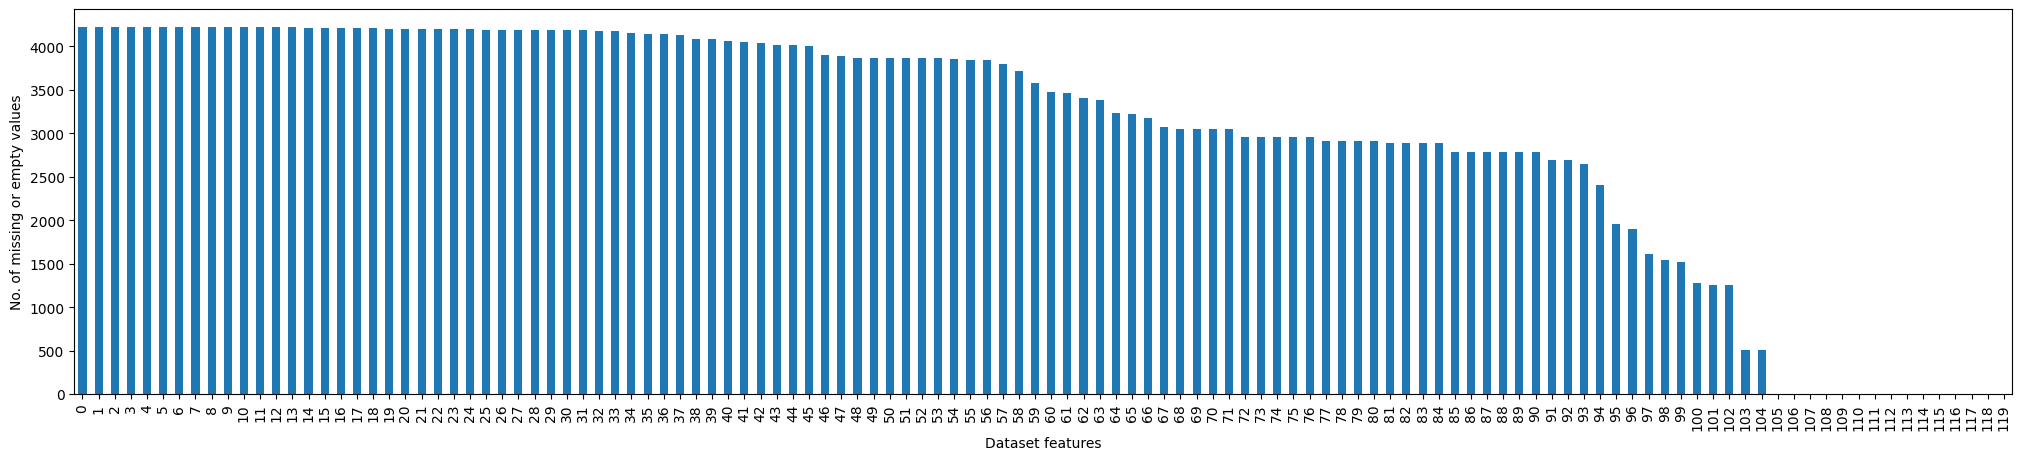

In [119]:
noisyData = ShowNullValues(survey)

### Let's check if respondents or workers have any history of disorders or if they work in technology sector.

In [120]:
Disorder = survey.loc[:, survey.columns.str.contains('Disorder|disorder|syndrome|other', regex=True)]
Disorder.fillna('', inplace=True)
DisorderNotes = Disorder.apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
survey['Disorder Notes'] = DisorderNotes
survey['Disorder'] = DisorderNotes
disorderTerms = 'disorder|Disorder|negative|Negative|syndrome|Syndrome|bipolar|Bipolar|depression|Depression|autism|PTSD|Yes|yes'
survey.loc[survey['Disorder'].str.contains(disorderTerms , regex=True), 'Disorder'] = 1
survey.loc[survey['Disorder']!=1, 'Disorder'] = 0
survey.drop(Disorder, axis=1, inplace=True)
showDisorder = survey[['Disorder', 'Disorder Notes']]
print(survey['Disorder'].unique())

[0 1]


In [121]:
techEmployer = survey.loc[:, survey.columns.str.contains('tech company|tech/IT', regex=True)]
techEmployer.fillna(' ', inplace=True)
survey['Primarily a Tech Employer'] = techEmployer.apply(lambda row: ''.join(row.values.astype(str)), axis=1)
survey.loc[survey['Primarily a Tech Employer'].str.contains('yes|Yes|1|1.0|True|true' , regex=True, na=False), 'Primarily a Tech Employer'] = 1
survey.loc[survey['Primarily a Tech Employer'].str.contains('no|No|0|0.0|False|false' , regex=True, na=False), 'Primarily a Tech Employer'] = 0
survey.drop(techEmployer, axis=1, inplace=True)
showTechEmployer = survey['Primarily a Tech Employer']
print(showTechEmployer.unique())

[1 0 '  ']


                                                    Total missing    Percent
how has it affected your career?                             4158  98.577525
any additional notes or comments                             4054  96.111901
has being identified as a person with a mental ...           4038  95.732575
what us state or territory do you *live* in?                 4014  95.163585
what us state or territory do you *work* in?                 4014  95.163585
if maybe, what condition(s) do you believe you ...           3896  92.366050
*are you self-employed?*                                     3866  91.654813
would you bring up your *mental* health with a ...           3866  91.654813
*do you have previous employers?*                            3866  91.654813
if yes, what percentage of your work time (time...           3851  91.299194
if there is anything else you would like to tel...           3839  91.014699
do you believe your productivity is ever affect...           3714  88.051209

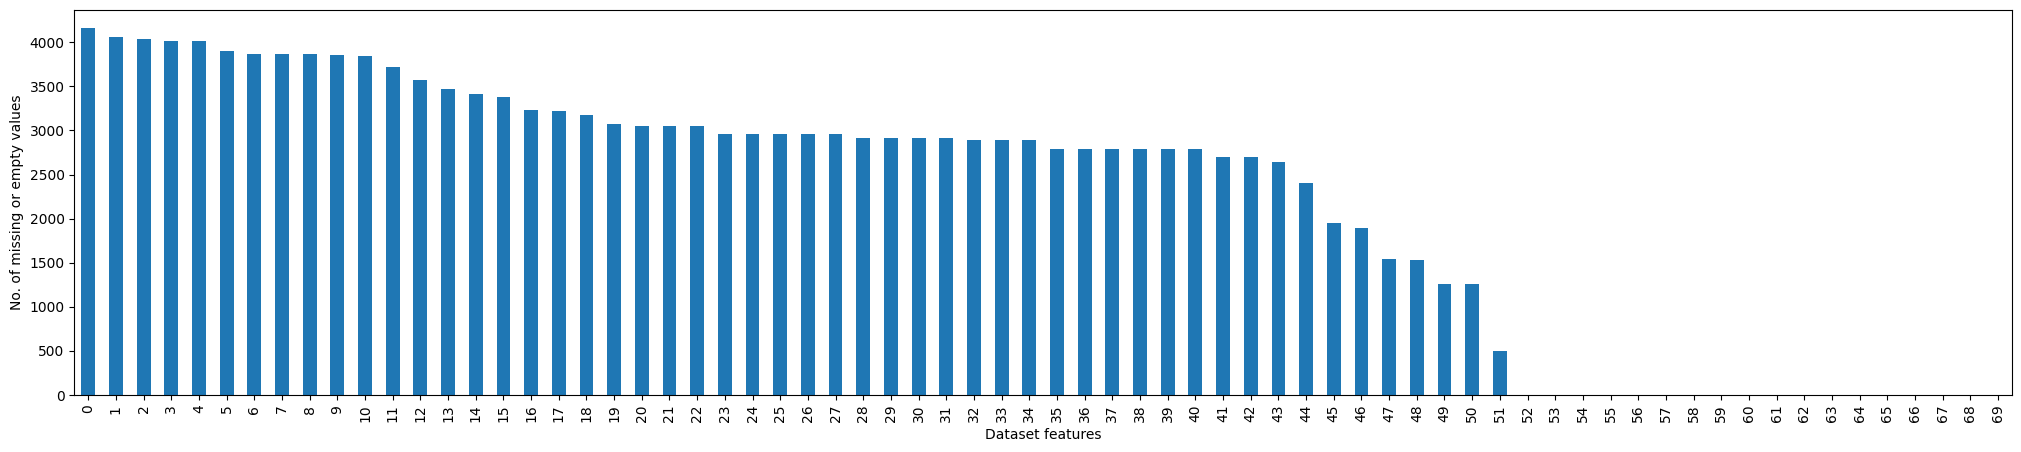

In [122]:
noisyData = ShowNullValues(survey)

### The dataset is cleaned to remove duplicate columns and the mostly empty features.

In [123]:
survey = survey.loc[:, ~survey.columns.duplicated()]
survey.replace('', np.nan, inplace=True)   


emptyColumns = survey.isnull().sum() 
for column in emptyColumns.index:
      if emptyColumns[column]>1000:
          survey.drop(column, axis=1, inplace=True)

### The features in the cleaned dataset are typecasted to their appropriate datatype. It is then exported and saved as a CSV file.

In [124]:
for feature in survey:
    try: 
        survey[feature] = pd.to_numeric(survey[feature], errors='coerce').astype(int)
        print('int cast\t\t', feature)
    except:
       try:
           survey[feature] = survey[feature].astype(str)
           survey.loc[survey[feature].str.contains('^\s+$|nan' , regex=True), feature] = np.nan
           print('object/float cast\t', feature)
       except:
           continue
                 
survey.to_csv('cleanedDatasets/finaldata.csv', index=False)

object/float cast	 Family History of Mental Illness
object/float cast	 Company Size
int cast		 Age
object/float cast	 Age-Group
object/float cast	 Gender
int cast		 Sought Treatment
object/float cast	 Describe Past Experience
object/float cast	 Prefer Anonymity
object/float cast	 Rate Reaction to Problems
object/float cast	 Negative Consequences
object/float cast	 Location
int cast		 Access to information
object/float cast	 Insurance
object/float cast	 Diagnosis
object/float cast	 Discuss Mental Health Problems
object/float cast	 Responsible Employer
object/float cast	 Disorder Notes
int cast		 Disorder
object/float cast	 Primarily a Tech Employer


                                  Total missing    Percent
Insurance                                  3714  88.051209
Describe Past Experience                   3273  77.596017
Prefer Anonymity                           2695  63.892840
Rate Reaction to Problems                  2695  63.892840
Diagnosis                                  1995  47.297297
Disorder Notes                             1260  29.871977
Company Size                                504  11.948791
Primarily a Tech Employer                   307   7.278331
Responsible Employer                         38   0.900901
Discuss Mental Health Problems               29   0.687530
Negative Consequences                         2   0.047416
Location                                      2   0.047416
Access to information                         0   0.000000
Sought Treatment                              0   0.000000
Gender                                        0   0.000000
Age-Group                                     0   0.0000

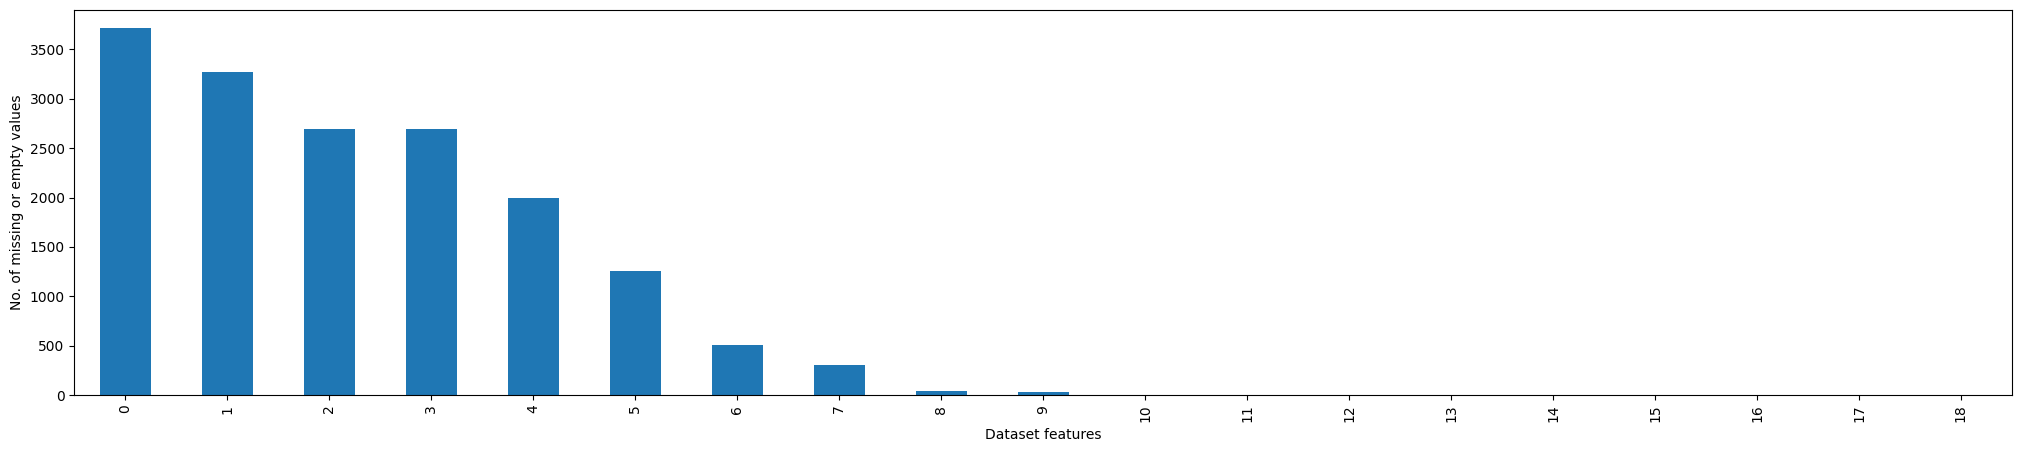

In [125]:
noisyData = ShowNullValues(survey)

In [126]:
print(survey.shape)

(4218, 19)


## The cleaned dataset, *finaldataset.csv*, is in **cleanedDatasets** directory.